In [1]:
import pandas as pd
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura/monitoramento_tempo.csv')

In [4]:
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [6]:
df['data'] = pd.to_datetime(df['data'])

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

(np.float64(16071.0), np.float64(16436.0))

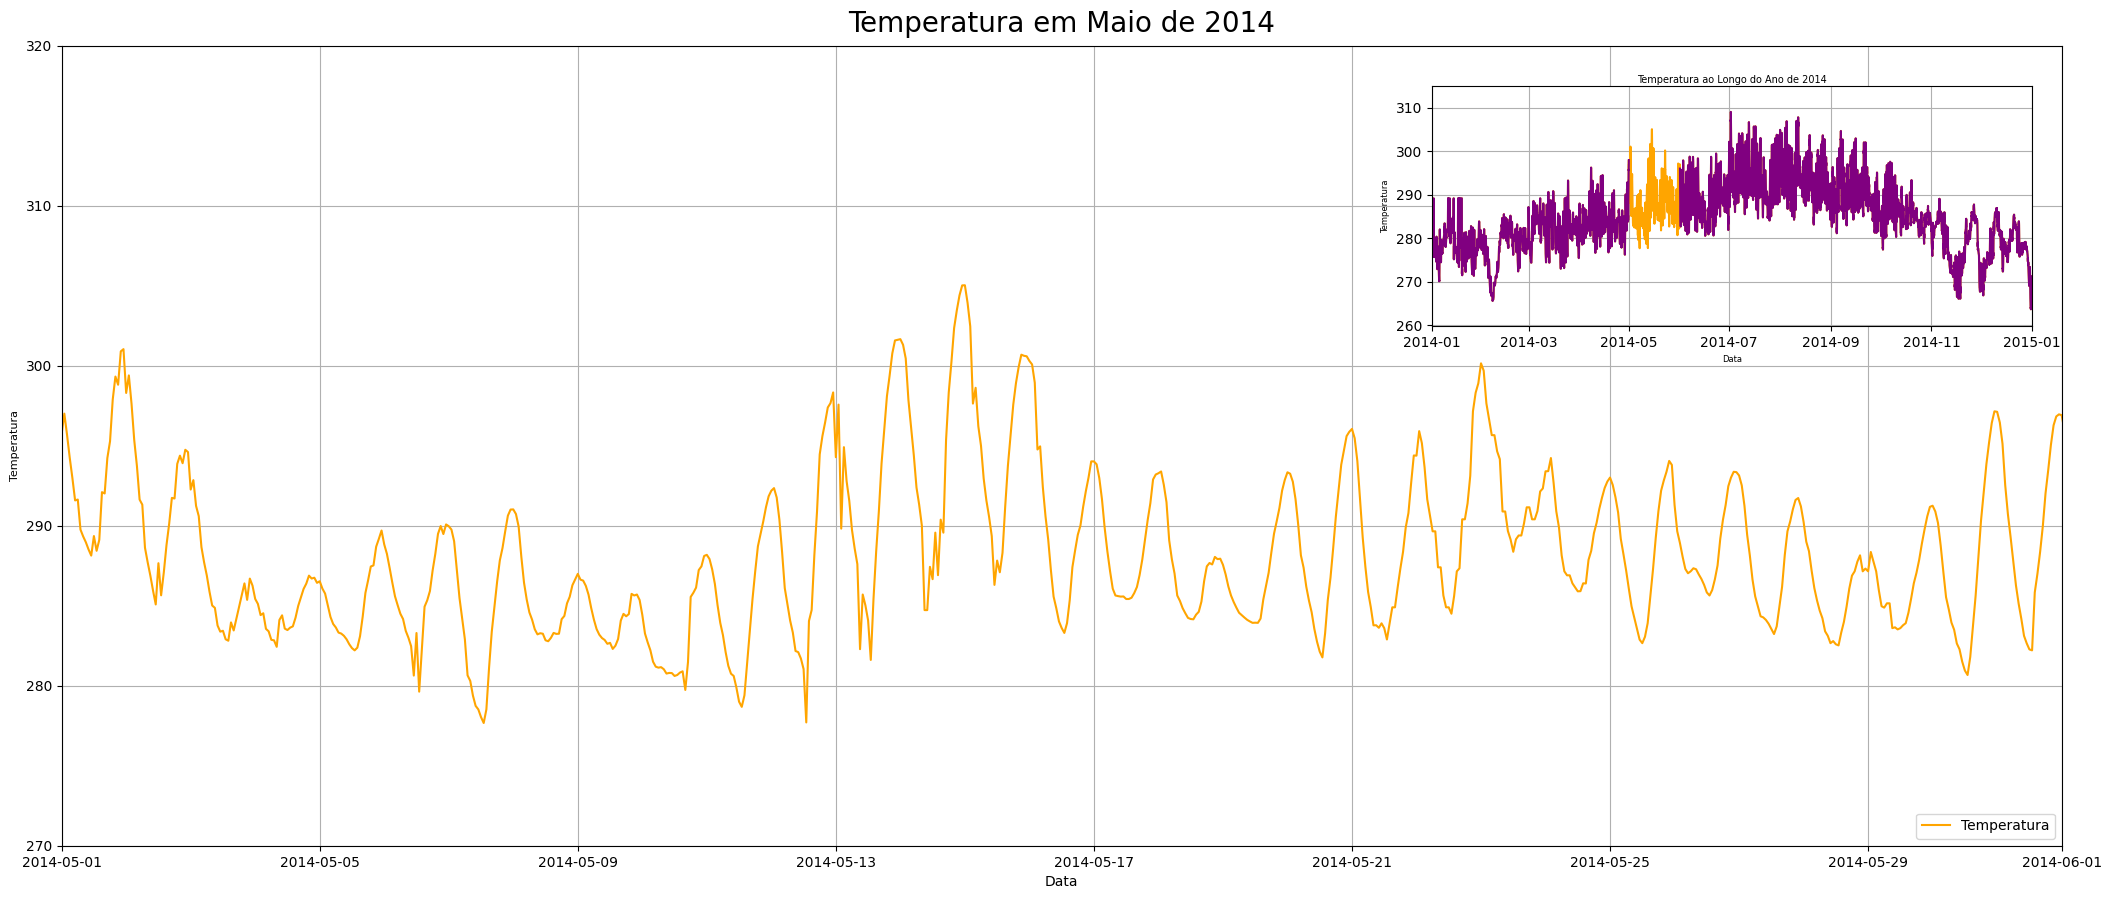

In [9]:
# Visualização 1:

fig = plt.figure(figsize=(20,8))
eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.685,0.65,0.3,0.3])

eixo.plot(df['data'], df['temperatura'], color = 'orange')
eixo.grid(True)
eixo.set_title('Temperatura em Maio de 2014', fontsize = 20, pad = 10)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10)
eixo.set_xlabel('Data', fontsize = 10)
eixo.set_ylabel('Temperatura', fontsize = 8)
eixo.set_xlim(datetime.datetime(2014,5,1), datetime.datetime(2014,6,1))
eixo.set_ylim(270,320)

purple_left = df['data'] < datetime.datetime(2014,5,1)
purple_right = df['data'] > datetime.datetime(2014,6,1)

eixo2.plot(df['data'], df['temperatura'], color = 'orange')
eixo2.plot(df['data'][purple_left], df['temperatura'][purple_left], color = 'purple')
eixo2.plot(df['data'][purple_right], df['temperatura'][purple_right], color = 'purple')
eixo2.set_title('Temperatura ao Longo do Ano de 2014', fontsize = 7, pad = 2)
eixo2.set_xlabel('Data', fontsize = 6)
eixo2.set_ylabel('Temperatura', fontsize = 6)
eixo2.grid(True)
eixo2.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1))

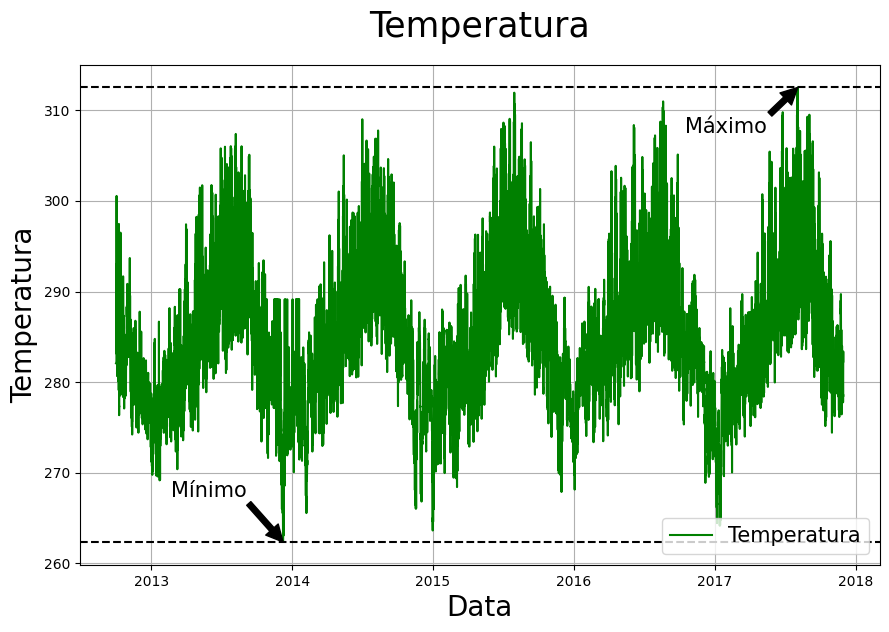

In [10]:
# Visualização 2:

fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

eixo.plot(df['data'], df['temperatura'], color = 'g')
eixo.set_title('Temperatura', fontsize=25, pad=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend(['Temperatura'], loc='lower right', fontsize=15)
eixo.grid(True)

x1 = df['data'][df['temperatura'].idxmax()]
y1 = df['temperatura'].max()

x2 = df['data'][df['temperatura'].idxmax() - 7000]
y2 = max(df['temperatura']) - 5

eixo.annotate("Máximo", xy=(x1,y1), fontsize=15,
              xytext=(x2,y2), arrowprops=dict(facecolor = 'k'))

x1 = df['data'][df['temperatura'].idxmin()]
y1 = df['temperatura'].min()

x2 = df['data'][df['temperatura'].idxmin() - 7000]
y2 = min(df['temperatura']) + 5

eixo.annotate("Mínimo", xy=(x1,y1), fontsize=15,
              xytext=(x2,y2), arrowprops=dict(facecolor = 'k'))

eixo.axhline(max(df['temperatura']), color = 'k', linestyle='--')
eixo.axhline(min(df['temperatura']), color = 'k', linestyle='--')

In [11]:
temperatura_diasemana = df.groupby('dia_da_semana')['temperatura'].mean()
dia_semana = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
temperatura_diasemana = temperatura_diasemana[dia_semana]
temperatura_diasemana

,temperatura
dia_da_semana,
Domingo,285.009095
Segunda,284.985382
Terça,284.892811
Quarta,284.998290
Quinta,285.000643
Sexta,285.060886
Sábado,285.003316


Text(0.5, 1.0, 'Temperatura por Dia da Semana')

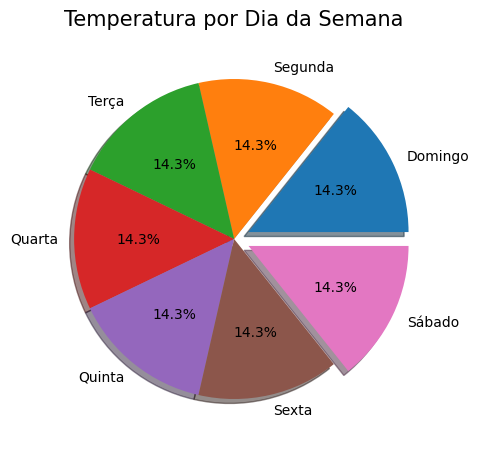

In [12]:
# Visualização 3: gráfico de pizza / pie chart

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

explodir = [0.1,0,0,0,0,0,0.1]

eixo.pie(temperatura_diasemana, labels = temperatura_diasemana.index,
         autopct='%.1f%%', explode=explodir, shadow = True)
eixo.set_title('Temperatura por Dia da Semana', fontsize = 15, pad = 10)